In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import os

from utils import *
from plot_utils import *
from AnalyseDefects_dev import AnalyseDefects
from AnalyseDefectsAll import AnalyseDefectsAll

plt.rcParams.update({"text.usetex": True})


In [27]:
dsuffix='lam'

if dsuffix == 'fric':
    data_suffix1 = 'fric01' #'lambda_minus1'
    data_suffix2 = 'fric10' #'lambda_plus1'
    data_suffix_out = 'fric_full'
elif dsuffix == 'lam':
    data_suffix1 = 'lam05'
    data_suffix2 = 'lam2'
    data_suffix_out = 'lam_full'
else:
    raise ValueError("dsuffix must be either 'fric' or 'lam'")

LL = 512
mode = 'all' # 'all' or 'short'


if data_suffix1 == 'fric01':
    prefix_list1 = ['', 'l', 'vl'] #['', 'l', '01']
    suffix_list1 = ['', 'l', 'vl'] #'01',]# '10']
    Nframes_list1 = [100, 400, 600] 
    count_suffix1 = "_periodic_rm0.1"
elif data_suffix1 == 'lam05':
    prefix_list1 = ['', 'l']
    suffix_list1 = ['', 'l']
    Nframes_list1 = [100, 400] 
    count_suffix1 = "_periodic_rm0.1"

if data_suffix2 == 'fric10':
    prefix_list2 = ['', 'l', 'vl'] #['', 'l', '01']
    suffix_list2 = ['', 'l'], 'vl' #'01',]# '10']
    Nframes_list2 = [100, 400, 600] 
    count_suffix2 = "_periodic_rm0.1"
elif data_suffix2 == 'fric001':
    prefix_list2 = ['', 'l'] #['', 'l', '01']
    suffix_list2 = ['', 'l'] #'01',]# '10']
    Nframes_list2 = [100, 400] 
    count_suffix2 = "_periodic_rm0.1"
elif data_suffix2 == 'lam2':
    prefix_list2 = ['', 'l']
    suffix_list2 = ['', 'l']
    Nframes_list2 = [100, 400] 
    count_suffix2 = "_periodic_rm0.1"


output_path1 = f'data\\na{LL}{data_suffix1}'
output_path2 = f'data\\na{LL}{data_suffix2}'

output_path_full = f'data\\na{LL}{data_suffix_out}'
save_path = os.path.join(output_path_full, 'figs')
save_path0 = 'C:\\Users\\Simon Andersen\\OneDrive - University of Copenhagen\\PhD\\Active Nematic Defect Transition\\figs\\SI'
if not os.path.exists(save_path0):
    os.makedirs(save_path0)
if not os.path.exists(save_path):
    os.makedirs(save_path)

defect_list1 = []
defect_list2 = []

if len(prefix_list1) > 0:
    for i, prefix in enumerate(prefix_list1):
        data_dict = dict(path = f'X:\\na512exp\\na{LL}{prefix}{data_suffix1}', \
                    suffix = 's' if len(prefix) == 0 else prefix, priority = i, LX = LL, Nframes = Nframes_list1[i])
        defect_list1.append(data_dict)
else:
    for i, suffix in enumerate(suffix_list1):
        data_dict = dict(path = f'X:\\na512exp\\na{LL}{data_suffix1}{suffix}', \
                    suffix = suffix, priority = 0, LX = LL, Nframes =  Nframes_list1[i])
        defect_list1.append(data_dict)

if len(prefix_list2) > 0:
    for i, prefix in enumerate(prefix_list2):
        data_dict = dict(path = f'X:\\na512exp\\na{LL}{prefix}{data_suffix2}', \
                    suffix = 's' if len(prefix) == 0 else prefix, priority = i, LX = LL, Nframes = Nframes_list2[i])
        defect_list2.append(data_dict)
else:
    for i, suffix in enumerate(suffix_list2):
        data_dict = dict(path = f'X:\\na512exp\\na{LL}{data_suffix2}{suffix}', \
                    suffix = suffix, priority = 0, LX = LL, Nframes =  Nframes_list2[i])
        defect_list2.append(data_dict)


ad1 = AnalyseDefects(defect_list1, output_path=output_path1, count_suffix=count_suffix1,)
ad2 = AnalyseDefects(defect_list2, output_path=output_path2, count_suffix=count_suffix2,)

if data_suffix1=='lam05':
    label_list = [r'$\lambda_{ref} / 2$', r'$\lambda_{ref} = 1$', r'$2 \lambda_{ref}$']
else: 
    label_list = [r'$\mu = 0.01$', r'$\mu_{ref} = 0$', r'$\mu = 0.1$']

In [28]:
## load reference data
LL = 512
output_path_ref = f'data\\na{LL}'
mode_ref = 'all' # 'all' or 'short'

defect_list_ref = gen_analysis_dict(LL, mode_ref)
ad0 = AnalyseDefects(defect_list_ref, output_path=output_path_ref)

In [ ]:
act_list_list = [ad1.act_list_merged, ad0.act_list_merged, ad2.act_list_merged]
marker_list = ['ro', 'bs', 'gd']

## plot av. defect density 

fig, ax = plt.subplots(figsize=(7,5))

av_defect_list = [ad1.get_arrays_av(use_merged=True)[-1], ad0.get_arrays_av(use_merged=True)[-1], ad2.get_arrays_av(use_merged=True)[-1]]

for i, label in enumerate(label_list):
    av_def = av_defect_list[i] / LL ** 2
    ax.errorbar(act_list_list[i], av_def[:,0], av_def[:,1], fmt = marker_list[i], label=label,
                elinewidth=1.5, capsize=1.5, capthick=1, markersize = 5, alpha=.5)

ax.set_xlabel(r'Activity ($\tilde{\zeta}$)')
ax.set_ylabel(r' Av. defect density ($\overline{\rho})$')
ax.vlines(x=0.022, ymin = -1e-2, ymax=.9e-2, linestyle='--', color='k', lw = 1, alpha=.5, zorder=-10)
ax.hlines(y=0, xmin=0, xmax=.1, linestyle='-', color='k', lw = 1 )

ax.xaxis.set_minor_locator(ticker.MultipleLocator(2e-3))   
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.5e-3))     
ax.set_xlim([0.014, 0.082])
ax.set_ylim(ymin=-.025e-2, ymax = .85e-2)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0, 2] if data_suffix_out == 'fric_full' else [0, 1, 2]
ax.legend([handles[i] for i in order], [labels[i] for i in order], \
        loc='upper center' if data_suffix_out=='fric_full' else 'lower right', ncols=3 if data_suffix_out=='fric_full' else 1)
fig.savefig(os.path.join(save_path, f'av_density_{data_suffix_out}.png'), dpi=420, bbox_inches='tight', pad_inches=0.1)
fig.savefig(os.path.join(save_path, f'av_density_{data_suffix_out}.eps'), bbox_inches='tight', pad_inches=0.1)
#fig.savefig(os.path.join(save_path0, f'av_density_{data_suffix_out}.png'), dpi=420, bbox_inches='tight', pad_inches=0.1)
#fig.savefig(os.path.join(save_path0, f'av_density_{data_suffix_out}.eps'), bbox_inches='tight', pad_inches=0.1)

In [ ]:
fig2, ax2 = plt.subplots(figsize=(7,5))
sus_list = [ad1.get_susceptibility(use_merged=True), 
            ad0.get_susceptibility(use_merged=True), 
            ad2.get_susceptibility(use_merged=True),]

for i, label in enumerate(label_list):
    sus = sus_list[i]
    ax2.errorbar(act_list_list[i], sus[:,0], sus[:,1], fmt = marker_list[i], label=label,
                elinewidth=1.5, capsize=1.5, capthick=1, markersize = 5, alpha=.5)
    
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(2.5e-3))   
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))     
ax2.set_xlim([.0178, 0.052])
ax2.set_ylim(ymin=0, ymax=11)
ax2.set_xlabel(r'Activity ($\tilde{\zeta}$)')
ax2.set_ylabel(r'Active susceptibility ($\overline{\chi_a})$')
ax2.vlines(x=0.022, ymin = -1.2, ymax=11, linestyle='--', color='k', lw = 1, alpha=.5, zorder=-10)
#ax2.vlines(x=0.022, ymin = 4.15, ymax=8.5, linestyle='--', color='k', lw = 1, alpha=.5, zorder=-10)
ax2.hlines(y=0, xmin=0, xmax=0.052, linestyle='-', color='k', lw = 1 )

handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0, 2] if data_suffix_out == 'fric_full' else [0, 1, 2]
ax2.legend([handles[i] for i in order], [labels[i] for i in order], loc='upper right')
fig2.savefig(os.path.join(save_path, f'susceptibility_{data_suffix_out}.png'), dpi=420, bbox_inches='tight')
fig2.savefig(os.path.join(save_path, f'susceptibility_{data_suffix_out}.eps'), bbox_inches='tight')
#fig2.savefig(os.path.join(save_path0, f'susceptibility_{data_suffix_out}.png'), dpi=420, bbox_inches='tight')
#fig2.savefig(os.path.join(save_path0, f'susceptibility_{data_suffix_out}.eps'), bbox_inches='tight')

In [ ]:
fig3, ax3 = plt.subplots(figsize=(7, 5))
fit_params_paths = [os.path.join(ad1.output_merged, 'fit_params_sfac_time_av.npy'), 
                    os.path.join(ad0.output_merged, 'fit_params_sfac_time_av.npy'),
                    os.path.join(ad2.output_merged, 'fit_params_sfac_time_av.npy')]

for i, label in enumerate(label_list):
    fit_params = np.load(fit_params_paths[i])
#   print(len(act_list_list[i]), fit_params.shape)
    act_idx_min = 3 if i == 0 else 0
    ax3.errorbar(act_list_list[i][act_idx_min:], fit_params[act_idx_min:,0], yerr=fit_params[act_idx_min:,2], fmt = marker_list[i], label=label,
                elinewidth=1.5, capsize=1.5, capthick=1, markersize = 5, alpha=.5)

ax3.xaxis.set_minor_locator(ticker.MultipleLocator(2.5e-3))   
ax3.yaxis.set_minor_locator(ticker.MultipleLocator(.1))     
ax3.set_xlim([.018, 0.052])
ax3.set_ylim(ymin=-.7, ymax=.25)
ax3.set_xlabel(r'Activity ($\tilde{\zeta}$)')
ax3.set_ylabel(r'Hyperuniformity exponent ($\gamma$)')
ax3.vlines(x=0.022, ymin = -1.2, ymax=.3, linestyle='--', color='k', lw = 1, alpha=.5, zorder=-10)
#ax3.vlines(x=0.022, ymin = -.16, ymax=1.2, linestyle='--', color='k', lw = 1)
ax3.hlines(y=0, xmin=0, xmax=0.052, linestyle='-', color='k', lw = 1 )

handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0, 2] if data_suffix_out == 'fric_full' else [0, 1, 2]
ax3.legend([handles[i] for i in order], [labels[i] for i in order], loc='lower right')
fig3.savefig(os.path.join(save_path, f'alpha_{data_suffix_out}.png'), dpi=420, bbox_inches='tight', pad_inches=0.1)
fig3.savefig(os.path.join(save_path, f'alpha_{data_suffix_out}.eps'), bbox_inches='tight', pad_inches=0.1)
#fig3.savefig(os.path.join(save_path0, f'alpha_{data_suffix_out}.png'), dpi=420, bbox_inches='tight', pad_inches=0.1)
#fig3.savefig(os.path.join(save_path0, f'alpha_{data_suffix_out}.eps'), bbox_inches='tight', pad_inches=0.1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


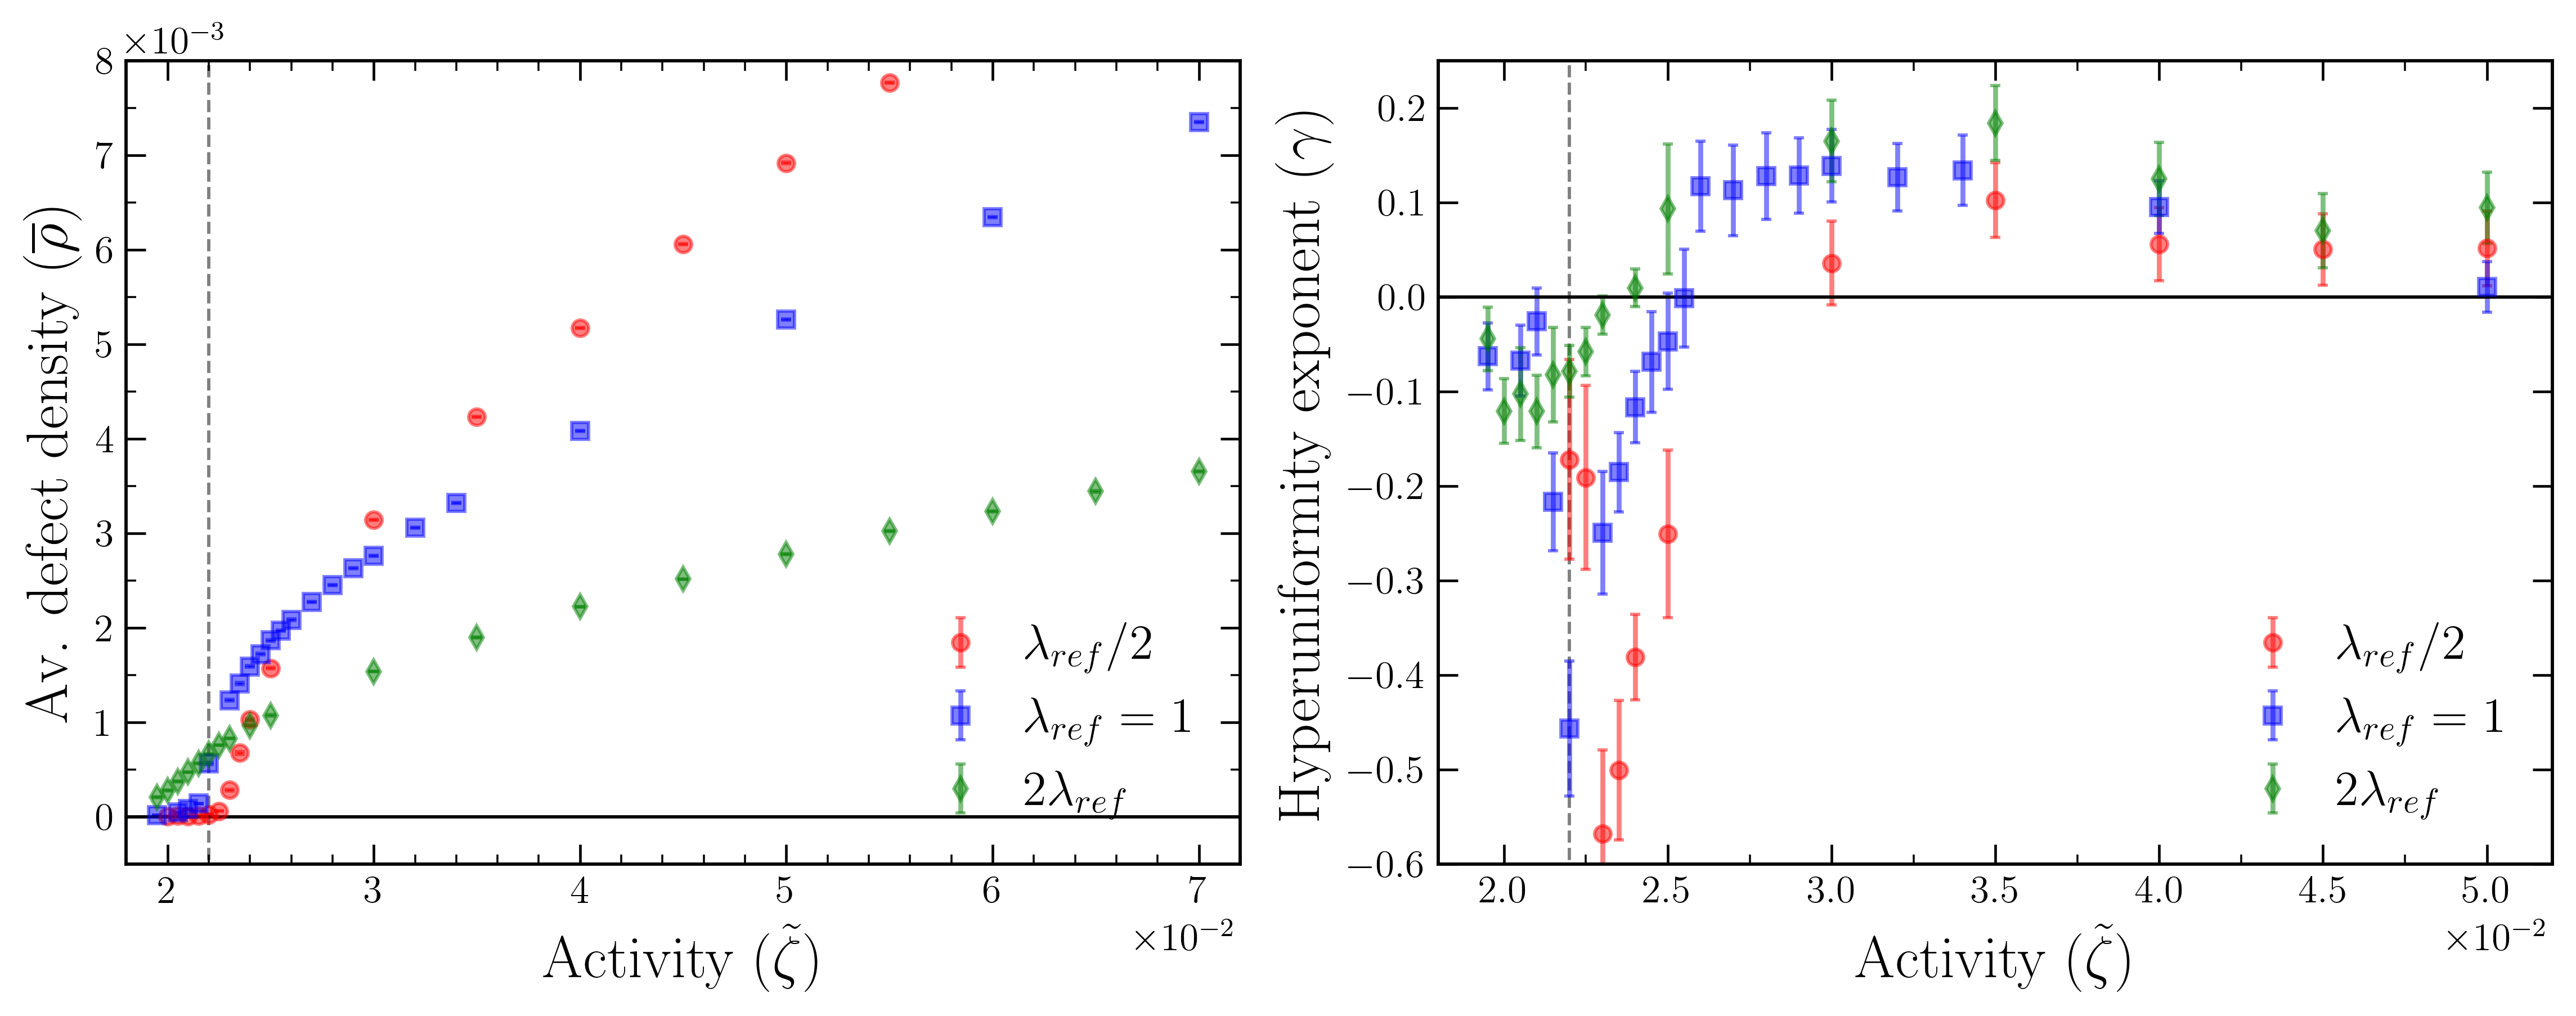

In [29]:
act_list_list = [ad1.act_list_merged, ad0.act_list_merged, ad2.act_list_merged]
marker_list = ['ro', 'bs', 'gd']

## plot av. defect density 
width = 11
height = width * (10/2.5)
fig0, ax0 = plt.subplots(ncols=2, figsize=(11,11/2.5))

ax=ax0[0]
ax3=ax0[1]

av_defect_list = [ad1.get_arrays_av(use_merged=True)[-1], ad0.get_arrays_av(use_merged=True)[-1], ad2.get_arrays_av(use_merged=True)[-1]]

for i, label in enumerate(label_list):
    av_def = av_defect_list[i] / LL ** 2
    ax.errorbar(act_list_list[i], av_def[:,0], av_def[:,1], fmt = marker_list[i], label=label,
                elinewidth=1.5, capsize=1.5, capthick=1, markersize = 5, alpha=.5)

ax.set_xlabel(r'Activity ($\tilde{\zeta}$)')
ax.set_ylabel(r' Av. defect density ($\overline{\rho})$')
ax.vlines(x=0.022, ymin = -1e-2, ymax=.8e-2, linestyle='--', color='k', lw = 1, alpha=.5, zorder=-10)
ax.hlines(y=0, xmin=0, xmax=.12, linestyle='-', color='k', lw = 1 )

ax.xaxis.set_minor_locator(ticker.MultipleLocator(2e-3))   
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.5e-3))     
ax.set_xlim([0.018, 0.072])
ax.set_ylim(ymin=-.05e-2, ymax = .8e-2)

handles, labels = ax.get_legend_handles_labels()
order = [1, 0, 2] if data_suffix_out == 'fric_full' else [0, 1, 2]
ax.legend([handles[i] for i in order], [labels[i] for i in order], loc='lower right')
#ax.legend(loc='lower right', ncols=1)


fit_params_paths = [os.path.join(ad1.output_merged, 'fit_params_sfac_time_av.npy'), 
                    os.path.join(ad0.output_merged, 'fit_params_sfac_time_av.npy'),
                    os.path.join(ad2.output_merged, 'fit_params_sfac_time_av.npy')]

for i, label in enumerate(label_list):
    fit_params = np.load(fit_params_paths[i])
#   print(len(act_list_list[i]), fit_params.shape)
    act_idx_min = 4 if (data_suffix_out == 'lam_full' and i == 0) else 0 
    ax3.errorbar(act_list_list[i][act_idx_min:], fit_params[act_idx_min:,0], yerr=fit_params[act_idx_min:,2], fmt = marker_list[i], label=label,
                elinewidth=1.5, capsize=1.5, capthick=1, markersize = 5, alpha=.5)

ax3.xaxis.set_minor_locator(ticker.MultipleLocator(2.5e-3))   
ax3.yaxis.set_minor_locator(ticker.MultipleLocator(.1))     
ax3.set_xlim([.018, 0.052])
ax3.set_ylim(ymin=-.6, ymax=.25)
ax3.set_xlabel(r'Activity ($\tilde{\zeta}$)')
ax3.set_ylabel(r'Hyperuniformity exponent ($\gamma$)')
ax3.vlines(x=0.022, ymin = -1.2, ymax=.3, linestyle='--', color='k', lw = 1, alpha=.5, zorder=-10)
#ax3.vlines(x=0.022, ymin = -.16, ymax=1.2, linestyle='--', color='k', lw = 1)
ax3.hlines(y=0, xmin=0, xmax=0.052, linestyle='-', color='k', lw = 1 )



#fig0.legend([handles[i] for i in order], [label_list[i] for i in order], fontsize=16,
#           bbox_to_anchor=(0.515, 1.04), loc='upper center', ncols=3)
ax3.legend([handles[i] for i in order], [labels[i] for i in order], loc='lower right')
#fig0.legend(ncol=3, fontsize = 16, bbox_to_anchor=(0.515, 1.04), loc='upper center')

fig0.savefig(os.path.join(save_path, f'av_density_alpha_{data_suffix_out}.png'), dpi=420, bbox_inches='tight', pad_inches=0.1)
fig0.savefig(os.path.join(save_path, f'av_density_alpha_{data_suffix_out}.eps'), bbox_inches='tight', pad_inches=0.1)
fig0.savefig(os.path.join(save_path0, f'av_density_alpha_{data_suffix_out}.png'), dpi=420, bbox_inches='tight', pad_inches=0.1)
fig0.savefig(os.path.join(save_path0, f'av_density_alpha_{data_suffix_out}.eps'), bbox_inches='tight', pad_inches=0.1)


In [ ]:
qc = lambda lam, zeta, k, eta, gamma: np.sqrt( (lam * zeta) / (2 * k * (2 * eta * gamma + lam ** 2)))
qs_res = lambda lam, zeta: qc(lam, zeta, k=0.05, eta=1, gamma=0.05)

for i, lam in enumerate([0.5,1,2]):
    plt.plot(act_list_list[0], qs_res(lam, act_list_list[0]), linestyle='--',
              color=marker_list[i][0], lw=1, label=f'QS {lam}')
plt.legend()

In [ ]:
qc = lambda lam, zeta, k, eta, gamma: np.sqrt( (lam * zeta) / (2 * k * (2 * eta * gamma + lam ** 2)))
q_res = lambda lam, zeta: qc(lam, zeta, k=0.05, eta=1, gamma=0.05)
lam_val_list = [0.5, 1, 2]


act_list_list = [ad1.act_list_merged, ad0.act_list_merged, ad2.act_list_merged]
marker_list = ['ro', 'bs', 'gd']

## plot av. defect density 

fig, ax = plt.subplots(figsize=(7,5))

av_defect_list = [ad1.get_arrays_av(use_merged=True)[-1], ad0.get_arrays_av(use_merged=True)[-1], ad2.get_arrays_av(use_merged=True)[-1]]

for i, label in enumerate(label_list):
    av_def = av_defect_list[i] / LL ** 1.8

    #av_def /= q_res(lam_val_list[i], act_list_list[i])[:, np.newaxis]**2 # normalize by qs_res

    act = act_list_list[i] #* np.sqrt(q_res(lam_val_list[i], act_list_list[i])) * np.sqrt(0.05 / act_list_list[i])

    ax.errorbar(act, av_def[:,0], av_def[:,1], fmt = marker_list[i], label=label,
                elinewidth=1.5, capsize=1.5, capthick=1, markersize = 5, alpha=.5)

ax.set_xlabel(r'Activity ($\zeta$)')
ax.set_ylabel(r' Av. defect density ($\overline{\rho})$')
#ax.vlines(x=0.022, ymin = -1e-2, ymax=.8e-2, linestyle='--', color='k', lw = 1)
#ax.hlines(y=0, xmin=0, xmax=.052, linestyle='-', color='k', lw = 1 )

ax.xaxis.set_minor_locator(ticker.MultipleLocator(2e-3))   
ax.yaxis.set_minor_locator(ticker.MultipleLocator(.5e-3))     
#ax.set_xlim([0.018, 0.052])
#ax.set_ylim(ymin=-.05e-2, ymax = .8e-2)
ax.legend(loc='lower right', ncols=3)